In [66]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import numpy.linalg as la

%matplotlib inline
%autosave 15

Autosaving every 15 seconds


In [36]:
img = image.imread("riXkudo_empty.png")
width, height, _ = img.shape
colors = {tuple(img[(x, y)]) for x in range(width) for y in range(height)}
print(colors)

{(0.0, 0.0, 0.0, 1.0), (1.0, 1.0, 1.0, 1.0), (0.0, 0.0, 0.0, 0.0)}


In [53]:
white_col = (1, 1, 1, 1)

def same_col(col_a, col_b):
    return np.all(col_a == col_b)

visited = np.zeros((width, height), dtype=bool)

def neighbours(vertex):
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_vertex = (vertex[0] + dx, vertex[1] + dy)
        if new_vertex[0] >= 0 and new_vertex[0] < width and new_vertex[1] >= 0 and new_vertex[1] < height:
            yield new_vertex

def dfs(vertex):
    visited[vertex] = True
    yield vertex
    for neighbour in neighbours(vertex):
        if not visited[neighbour] and np.all(img[vertex] == img[neighbour]):
            for v in dfs(neighbour):
                yield v
            
clusters = []
for x in range(width):
    for y in range(height):
        vertex = (x, y)
        if not visited[vertex] and same_col(img[vertex], white_col):
            clusters.append(np.array([v for v in dfs(vertex)]))

len(clusters)

72

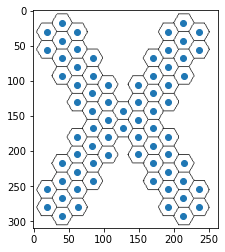

In [63]:
centers = np.array([c.mean(axis=0) for c in clusters])
plt.imshow(img)
plt.scatter(centers[:,1], centers[:,0])
plt.show()

In [69]:
distances = np.array([[la.norm(centers[i] - centers[j]) for i in range(len(centers))] for j in range(len(centers))])

In [89]:
neighbour_ranks = [sorted(list(range(len(centers))), key=lambda j: distances[i][j]) for i in range(len(centers))]

edges = []
for i in range(len(centers)):
    min_dist = distances[i][neighbour_ranks[i][1]]
    real_neighbours = [j for j in range(len(centers)) if j != i and distances[i][j] <= 1.1 * min_dist]
    print(i, '->', real_neighbours)
    for j in real_neighbours:
        edges.append((i, j))

0 -> [2, 3, 6]
1 -> [4, 5, 7]
2 -> [0, 6, 8]
3 -> [0, 6, 9]
4 -> [1, 7, 10]
5 -> [1, 7, 11]
6 -> [0, 2, 3, 8, 9, 12]
7 -> [1, 4, 5, 10, 11, 15]
8 -> [2, 6, 12]
9 -> [3, 6, 12, 13, 16]
10 -> [4, 7, 14, 15, 17]
11 -> [5, 7, 15]
12 -> [6, 8, 9, 16, 18]
13 -> [9, 16, 19]
14 -> [10, 17, 20]
15 -> [7, 10, 11, 17, 21]
16 -> [9, 12, 13, 18, 19, 22]
17 -> [10, 14, 15, 20, 21, 25]
18 -> [12, 16, 22]
19 -> [13, 16, 22, 23, 26]
20 -> [14, 17, 24, 25, 27]
21 -> [15, 17, 25]
22 -> [16, 18, 19, 26, 28]
23 -> [19, 26, 29]
24 -> [20, 27, 30]
25 -> [17, 20, 21, 27, 31]
26 -> [19, 22, 23, 28, 29, 32]
27 -> [20, 24, 25, 30, 31, 34]
28 -> [22, 26, 32]
29 -> [23, 26, 32, 33, 35]
30 -> [24, 27, 33, 34, 36]
31 -> [25, 27, 34]
32 -> [26, 28, 29, 35, 37]
33 -> [29, 30, 35, 36, 38]
34 -> [27, 30, 31, 36, 39]
35 -> [29, 32, 33, 37, 38, 41]
36 -> [30, 33, 34, 38, 39, 42]
37 -> [32, 35, 40, 41, 44]
38 -> [33, 35, 36, 41, 42]
39 -> [34, 36, 42, 43, 45]
40 -> [37, 44, 46]
41 -> [35, 37, 38, 44, 47]
42 -> [36, 38, 39,

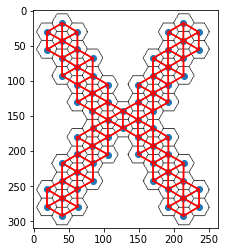

In [94]:
plt.imshow(img)
for u, v in edges:
    plt.plot([centers[u, 1], centers[v, 1]], [centers[u, 0], centers[v, 0]], color='red')
plt.scatter(centers[:,1], centers[:,0])
plt.show()

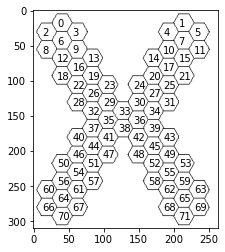

In [108]:
plt.imshow(img)
for i in range(len(centers)):
    plt.text(centers[i,1] - 7, centers[i,0] + 5, str(i))
plt.savefig('riXkudo_numbering.png', dpi=100)
plt.show()

In [110]:
with open('riXkudo_graph.txt', 'w') as f:
    print(len(centers), len(edges), file=f)
    for i, j in edges:
        print(i, j, file=f)